# Analysis of Fraser fir oil by GC-MS
**Al Fischer**  
January 31, 2019

# Introduction



*Abies fraseri* is a coniferous tree endemic to the Southern Appalachian Mountains of Virginia, North Carolina, and Tennessee. It is widely known and cultivated as a Christmas tree, but has come under threat due to the invasive balsam woolly adelgid.  Although, previous studies have looked into the chemosystematics of fir trees using solid-phase micro extraction (SPME) with GC-MS [1, 2], the goal of this study is to determine how SPME results may differ from traditional oil extraction by hydro-distillation. This initial experiment will focus on developing a GC-MS analysis method.  I hypothesize that SPME provides a better picture of more the volatile components of *A. fraseri* extract, while hydro-distillation will provide a more complete extraction of higher boiling boint compounds.  Hydrodistillation will be conducted on fir needles and the hydrophobic extract will be analyzed by gas chromatography-mass spectrometry (GC-MS).  Again, during this initial study, the goal will be to develop a GC-MS method with adequate resolution to identify all components present and to begin to identify the primary constituents using mass spectrometry.

# Materials and Methods

## Sample Preparation

Fir oil was extracted using steam distillation, with a homemade distillation apparatus.  It consisted of an 1-L Erlenmeyer flask, a heat source (hotplate), a glass angle adapter with a neoprene stopper on one end to fit into the flask and a ground-glass fitting on the other side to mate to a standard jacketed cold water condenser.  The distillate was collected into a graduated cylinder.

Prior to the steps listed below, fir branches were cut from the bottom 0.5 m of farmed Fraser fir trees.  Cut branches were placed in a polyethylene bag and transported to the lab in a cooler on ice for further processing.

### Steps:
1. Fraser fir (*Abies fraseri*) needles and branch tips were stripped from the branches by hand and chopped with stainless steel shears.
1. 0.532 kg of the cut needles and branch tips was added to an Erlenmeyer flask.
1. 300 mL of tap water was added to the flask.
1. The distillation apparatus was placed on the flask and the mixture was heated to a boil on a hotplate.
1. Approximately 50 mL of distillate was collected into a 50-ml graduated cylinder.
1. The distillate was allowed to sit for an hour to give the organic layer time to fully separate from the aqueous layer.
1. The upper organic layer was removed with a glass pipette and placed in a glass amber 1-dram vial for analysis; the aqueous layer was mixed 50:50 with isopropyl alcohol and placed under refridgeration at 5°C for preservation.

**Total yield of oil: 1.487 mL**


## GC-MS Analysis

1. 1 drop of the oil was placed in amber glass vial and diluted to 2 ml with ethanol.
1. The sample was run on an Agilen 5890 gas chromatograph equipped with an Agilent 5975C Mass-seletive Detector; the GC and MS parameters can be found in the tables below.
1. Data were acquired with the Agilent GC-MS data acquisition software; chromatograms and mass spectra were exported as CSV files and processed in Julia.

<center>
<b>
Table 1: GC Method
</b>
</center>

Parameter | Value
----- | -----
Make & Model | Agilent 5890
Column | HP-5ms
Carrier | UHP He @ 9 psi
Injection Port Temp (°C) | 250
Initial Oven Temp | 30°C for 1 min
Oven Ramp Rate| 30°C per min
Final Oven| 250°C for 3 min

<center>
<b>
Table 2: MS Parameters
</b>
</center>

Parameter | Value
----- | -----
Make & Model | Agilent 5975C
Source | Electron Ionization
Mass Filter | Quadrupole
Detector | Electron Multiplier
Acquisition Mode | Scan
Scan Range | 30 - 400 m/z
Scan Speed | Normal
Source Temp | 250°C

# Results and Data Analysis



## Chromatogram: First Glance


In [13]:
##### Import the Chromatography Data #####
##########################################

using DataFrames
abfrChrom = readtable(
            "20180831_abiesFraseri_tic01.txt", separator = '\t',
            skipstart = 3, header = true
    )[:, 1:2];
abfrChrom[:relAbundance] = abfrChrom[:Counts] ./ maximum(abfrChrom[:Counts]) * 100;
first(abfrChrom, 2)

2×3 DataFrame
│ Row │ Time     │ Counts   │ relAbundance │
│     │ Float64⍰ │ Float64⍰ │ Float64      │
├─────┼──────────┼──────────┼──────────────┤
│ 1   │ 3.091    │ 51530.0  │ 0.657859     │
│ 2   │ 3.096    │ 50391.0  │ 0.643318     │

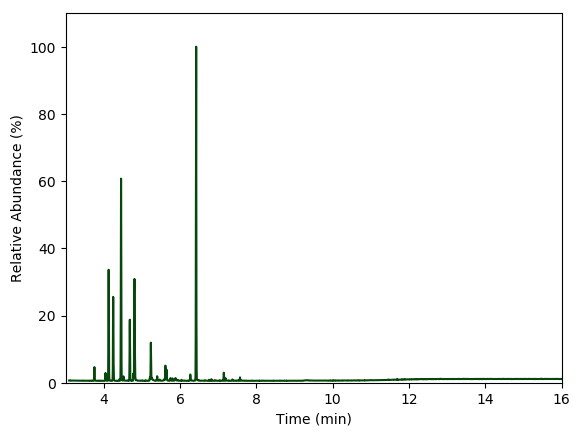

In [12]:
#####  Plot the Chromatography Data  #####
##########################################

using PyPlot
plot(abfrChrom[:Time], abfrChrom[:relAbundance], color = "xkcd:Forest Green", linewidth = 1.5);
ax = gca();
ax[:set_xlim]([3,16]); ax[:set_ylim]([0,110]);
xlabel("Time (min)"); ylabel("Relative Abundance (%)");

**Figure 1:** Gas chromatogram of *Abies fraseri* extract. A solvent delay of 3.5 minutes was used.

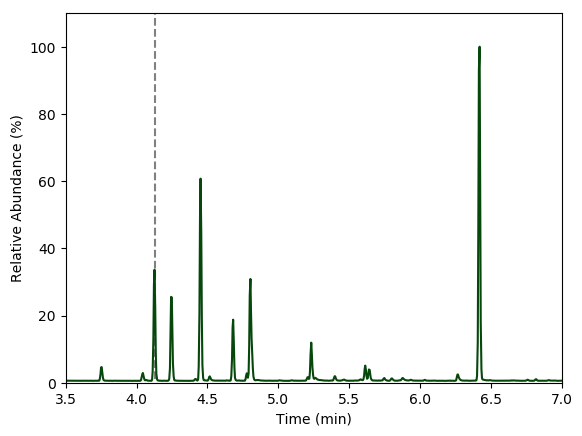

In [6]:
#####  Plot the Chromatography Data - region of interest #####
##############################################################

plot(ones(110)*4.13, collect(1:1:110), "--", color = "gray")
plot(abfrChrom[:Time], abfrChrom[:relAbundance], color = "xkcd:Forest Green", linewidth = 1.5);
ax = gca();
ax[:set_xlim]([3.5,7]); ax[:set_ylim]([0,110]);
xlabel("Time (min)"); ylabel("Relative Abundance (%)");

**Figure 2:** The same gas chromatogram as Figure 1, but zoomed to show the region of interest.  The dashed grey line indicates the retention time of the peak selected for analysis.

Overall, the chromatogram suggests the extract contains at least **13 major constituents** and perhaps more trace constituents.

The peaks of the chromatogram should be integrated to get a percent composition for each -- something that will be done in the future.  Each peak will also be identified by its mass spectrum at that point.  For now, only the first sizeable peak, with a retention time of 4.13 minutes, will be analyzed.  This is thought to be $\alpha$-pinene.

## Mass Spectrum of Peak @ 4.13 Minutes: First Glance

In [10]:
##### Import MS Data #####
##########################

pineneMS = readtable(
            "20180830_a-pinene.txt", separator = '\t',
            skipstart = 3, header = true
    )[:, 1:2];
pineneMS[:relAbundance] = pineneMS[:Abundance] ./ maximum(pineneMS[:Abundance]) * 100;
first(pineneMS, 2)

2×3 DataFrame
│ Row │ m_z      │ Abundance │ relAbundance │
│     │ Float64⍰ │ Float64⍰  │ Float64      │
├─────┼──────────┼───────────┼──────────────┤
│ 1   │ 30.1     │ 2665.0    │ 0.0503685    │
│ 2   │ 31.0     │ 674.0     │ 0.0127386    │

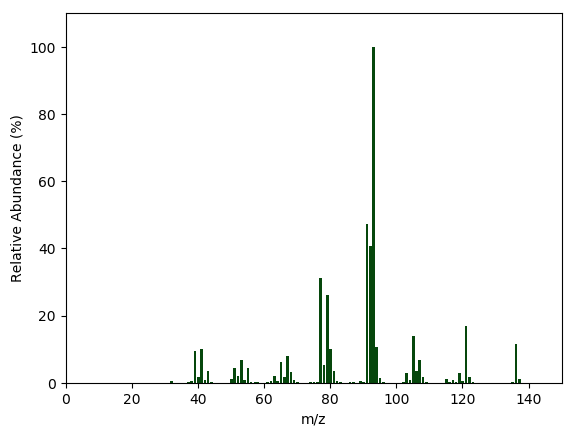

In [11]:
#####  Plot the MS Data  #####
##############################

bar(pineneMS[:m_z], pineneMS[:relAbundance], color = "xkcd:Forest Green");
ax = gca();
ax[:set_xlim]([0,150]); ax[:set_ylim]([0,110]);
xlabel("m/z"); ylabel("Relative Abundance (%)");

**Figure 3:** The mass spectrum corresponding the peak with a retention time of 4.13 minutes, as indicated by the dashed grey line in the chromatogram (Figure 2, above).

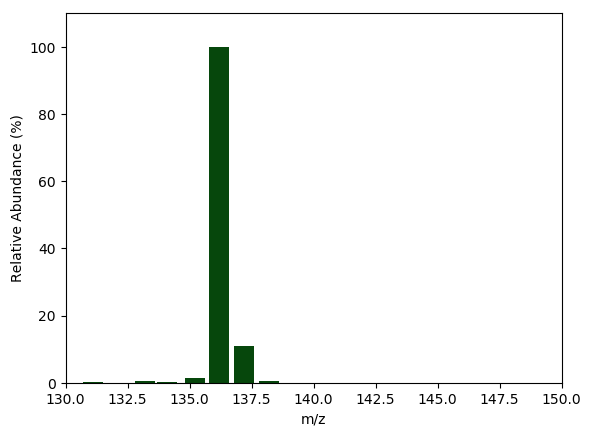

In [31]:
#####  Zoom in on M+.  #####
############################

molIonRegion = pineneMS[90:102, :];
molIonRegion[:relAbundance] = molIonRegion[:Abundance] ./ maximum(molIonRegion[:Abundance]) * 100;

bar(molIonRegion[:m_z], molIonRegion[:relAbundance], color = "xkcd:Forest Green");
ax = gca();
ax[:set_xlim]([130,150]); ax[:set_ylim]([0,110]);
xlabel("m/z"); ylabel("Relative Abundance (%)");

**Figure 4:** The molecular ion region for the mass spectrum in Figure 3.  The *y*-axis has been rescaled to make M$^{+.}$ = 100%.

In [32]:
# Print the data used for the plot
molIonRegion

13×3 DataFrame
│ Row │ m_z      │ Abundance │ relAbundance │
│     │ Float64⍰ │ Float64⍰  │ Float64      │
├─────┼──────────┼───────────┼──────────────┤
│ 1   │ 128.1    │ 2502.0    │ 0.410089     │
│ 2   │ 129.1    │ 1190.0    │ 0.195046     │
│ 3   │ 130.1    │ 231.0     │ 0.0378619    │
│ 4   │ 131.1    │ 867.0     │ 0.142105     │
│ 5   │ 132.0    │ 301.0     │ 0.0493352    │
│ 6   │ 133.2    │ 2282.0    │ 0.37403      │
│ 7   │ 134.1    │ 1349.0    │ 0.221107     │
│ 8   │ 135.2    │ 7970.0    │ 1.30632      │
│ 9   │ 136.2    │ 610112.0  │ 100.0        │
│ 10  │ 137.2    │ 66160.0   │ 10.8439      │
│ 11  │ 138.2    │ 2970.0    │ 0.486796     │
│ 12  │ 139.1    │ 171.0     │ 0.0280276    │
│ 13  │ 206.8    │ 286.0     │ 0.0468766    │

There are several options for the molecular ion (A).  The ion at 136 seems to be a good candiate.  Assuming a molecule composed of C and H, this would give C$_{10}$H$_{16}$.  This fits quite well with the isotopic abudances given in Table 2.2 of McLafferty [3].  This formula should yield A = 100%, A+1 = 11%, and A+2 = 0.5%, very close to the 100, 10.8, and 0.49% abundances observed for the sample.  This formula would fit for the compound suspected, $\alpha$-pinene.

$\alpha$-pinene has a unique, multi-ringed structure (Figure 5).  We see several routes toward losing a methyl group (CH$_3$, m/z = 15), and indeed there is a sizable peak at 136 - 15 = 121 (Figure 3). Another likely fragmenation would be to break of a portion of the 4-memebered ring, losing two methyl groups and a C atom (total m/z = 42).  This would yield a mass of 94, which is present in small amounts; however, a mass of 94 could easily rearrage to lose a proton and produce the base peak of m/z = 93.  Overall, the mass spectrum supports the hypothesis that peak represents $\alpha$-pinene.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Alpha-Pinene_Isomers.svg/1920px-Alpha-Pinene_Isomers.svg.png" alt="The structure of pinene" width="300"/>
</center>

# Conclusions

The hydrodistillation of fraser fir needles successfully produced a reasonable yield of oil.  In all, 1.487 mL of oil was obtained from approximately 0.5 kg of needles. Although obtaining this amount of oil was very labor intensive with the small-scale glassware, the process could be easily scaled up to achieve the same amount of oil in less time and with less labor.

The GC-MS method developed here provided adequate resolution to identify the major components of the extract.  Twelve major peaks were observed, all of which were well-resolved.  One peak was identified as α-pinene, and the remaining peaks will be identified in future analysis.  Overall, the method presented here is suitable for additional analyses exploring the difference between hydrodistilled extracts and SPME extracts and no changes will be made to the method moving forward.

# References

***Notes: The ACS style does not include the DOI number, but it is good to include because it provides a quick way to access the article.***

1. Sutton, B. A.; Woosley, R. S.; & Butcher, D. J. Determination of Monoterpenes in Oleoresin: A Chemosystematic Study of the Interaction between Fraser Fir (Abies fraseri) and Balsam Woolly Adelgid (Adelges piceae). *Microchem. J.*, **1997** *56*, 332–342. [doi:10.1006/mchj.1996.1425](http://dx.doi.org/10.1006/mchj.1996.1425)

1. Vereen, D. A.; McCall, J. P.; & J. Butcher, D. Solid phase microextraction for the determination of volatile organics in the foliage of Fraser fir (*Abies fraseri*). *Microchem. J.*, **2000** *65*, 269–276. [doi:10.1016/S0026-265X(00)00122-3](http://dx.doi.org/10.1016/S0026-265X(00)00122-3)

1. McLafferty, F.W. and Turecek, F. *Interpretation of Mass Spectra*, 4th Edition, University Science Books, Sausalito, CA, 1994. ISBN: 9780935702255